# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Impor the OpenWeatherMap API key
from challenge6_api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [12]:
cities


['megion',
 'port alfred',
 'ambodifototra',
 'norman wells',
 'ancud',
 'tocopilla',
 'busselton',
 'mana',
 'jakarta',
 'rikitea',
 'gladstone',
 'port blair',
 'miri',
 'barrow',
 'mataura',
 'taolanaro',
 'estelle',
 'arraial do cabo',
 'belaya gora',
 'georgetown',
 'pyapon',
 'hamilton',
 'khandbari',
 'araouane',
 'grand gaube',
 'comodoro rivadavia',
 'ushuaia',
 'kangavar',
 'new norfolk',
 'aksu',
 'leningradskiy',
 'arcachon',
 'quatre cocos',
 'grand river south east',
 'longyearbyen',
 'pisco',
 'caravelas',
 'hobart',
 'ponta delgada',
 'albany',
 'kysyl-syr',
 'manoel urbano',
 'kursenai',
 'port elizabeth',
 'hermanus',
 'necochea',
 'barentsburg',
 'butaritari',
 'kodiak',
 'batemans bay',
 'mantes-la-jolie',
 'boke',
 'nanortalik',
 'shumikhinskiy',
 'statesboro',
 'khatanga',
 'sorland',
 'beisfjord',
 'shingu',
 'atar',
 'naze',
 'basoko',
 'blagoyevo',
 'puerto ayora',
 'jamestown',
 'faanui',
 'saint-philippe',
 'farkhor',
 'babai',
 'neuquen',
 'avarua',
 'vaini'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
#cities = cities[:20]

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitude, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | megion
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | tocopilla
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | mana
Processing Record 9 of Set 1 | jakarta
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | gladstone
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | miri
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | estelle
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | belaya gora
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | pyapon
Processing Record 22 of

Processing Record 35 of Set 4 | garden city
Processing Record 36 of Set 4 | tuatapere
Processing Record 37 of Set 4 | sergeyevka
Processing Record 38 of Set 4 | tres arroyos
Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | severnyy
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | negri
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 46 of Set 4 | youhao
Processing Record 47 of Set 4 | newport
Processing Record 48 of Set 4 | toliary
City not found. Skipping...
Processing Record 49 of Set 4 | mashhad
Processing Record 0 of Set 5 | acapulco
Processing Record 1 of Set 5 | atuona
Processing Record 2 of Set 5 | tura
Processing Record 3 of Set 5 | oktyabrskoye
Processing Record 4 of Set 5 | kawalu
Processing Record 5 of Set 5 | saquena
Processing Record 6 of Set 5 | coquimbo
Processing Record 7 of Set 5 | taoudenni
Process

Processing Record 23 of Set 8 | lagoa santa
Processing Record 24 of Set 8 | alta floresta
Processing Record 25 of Set 8 | babanusah
City not found. Skipping...
Processing Record 26 of Set 8 | amga
Processing Record 27 of Set 8 | waingapu
Processing Record 28 of Set 8 | coahuayana
Processing Record 29 of Set 8 | zhigansk
Processing Record 30 of Set 8 | general pico
Processing Record 31 of Set 8 | ferrol
Processing Record 32 of Set 8 | bambanglipuro
Processing Record 33 of Set 8 | ypsonas
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | port-cartier
Processing Record 36 of Set 8 | nago
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | volginskiy
City not found. Skipping...
Processing Record 39 of Set 8 | borlange
City not found. Skipping...
Processing Record 40 of Set 8 | saleaula
City not found. Skipping...
Processing Record 41 of Set 8 | pitimbu
Processing Record 42 of Set 8 | najran
Processing Record 43 of Set 8 | chapais
Processing Rec

Processing Record 11 of Set 12 | neiafu
Processing Record 12 of Set 12 | whitehorse
Processing Record 13 of Set 12 | jinka
Processing Record 14 of Set 12 | bogorodskoye
Processing Record 15 of Set 12 | morwa
Processing Record 16 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 17 of Set 12 | yuncheng
Processing Record 18 of Set 12 | moussoro
Processing Record 19 of Set 12 | nikolsk
Processing Record 20 of Set 12 | cape elizabeth
City not found. Skipping...
Processing Record 21 of Set 12 | medvedevo
Processing Record 22 of Set 12 | mehamn
Processing Record 23 of Set 12 | aloja
Processing Record 24 of Set 12 | green river
Processing Record 25 of Set 12 | lerwick
Processing Record 26 of Set 12 | tingi
Processing Record 27 of Set 12 | colac
Processing Record 28 of Set 12 | san andres
Processing Record 29 of Set 12 | raudeberg
Processing Record 30 of Set 12 | port hedland
Processing Record 31 of Set 12 | namatanai
Processing Record 32 of Set 12 | calvinia
Process

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url+"london")
json= response.json()
print (json)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.92, 'feels_like': 5.7, 'temp_min': 7.22, 'temp_max': 8.77, 'pressure': 1021, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 3.53, 'deg': 208, 'gust': 10.77}, 'clouds': {'all': 100}, 'dt': 1676524397, 'sys': {'type': 2, 'id': 2019646, 'country': 'GB', 'sunrise': 1676531608, 'sunset': 1676567760}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show record count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,megion,61.0296,76.1136,-9.99,97,99,3.72,RU,1676524985
1,port alfred,-33.5906,26.8910,19.54,96,99,0.45,ZA,1676524900
2,norman wells,65.2820,-126.8329,-27.98,76,75,1.54,CA,1676524979
3,ancud,-41.8697,-73.8203,8.61,72,62,3.98,CL,1676524896
4,tocopilla,-22.0920,-70.1979,21.61,84,37,1.35,CL,1676524914


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,megion,61.0296,76.1136,-9.99,97,99,3.72,RU,1676524985
1,port alfred,-33.5906,26.8910,19.54,96,99,0.45,ZA,1676524900
2,norman wells,65.2820,-126.8329,-27.98,76,75,1.54,CA,1676524979
3,ancud,-41.8697,-73.8203,8.61,72,62,3.98,CL,1676524896
4,tocopilla,-22.0920,-70.1979,21.61,84,37,1.35,CL,1676524914


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

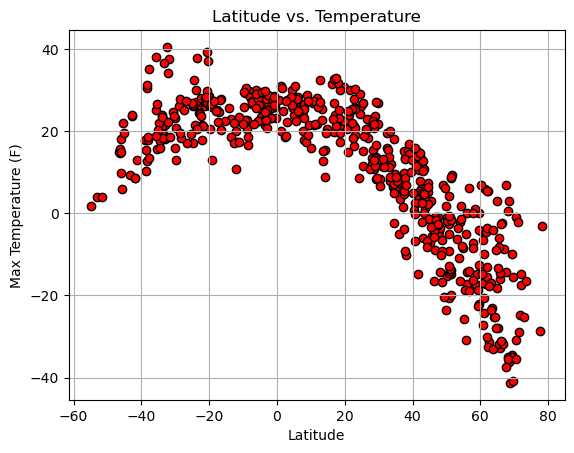

In [27]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp, marker = "o", facecolors = "r", edgecolor = "black")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

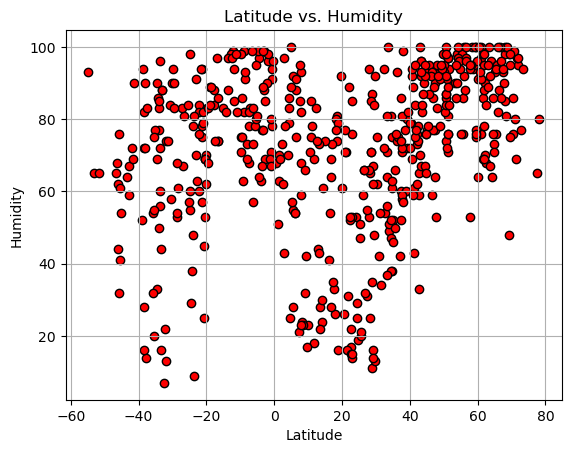

In [26]:
# Build the scatter plots for latitude vs. humidity
lat_2 = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(lat_2, humidity, marker = "o", facecolors = "r", edgecolor = "black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

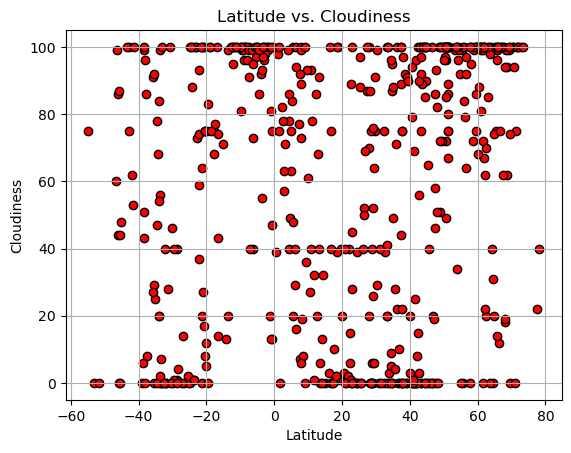

In [28]:
# Build the scatter plots for latitude vs. cloudiness
lat_3 = city_data_df["Lat"]
humidity = city_data_df["Cloudiness"]
plt.scatter(lat_3, humidity, marker = "o", facecolors = "r", edgecolor = "black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

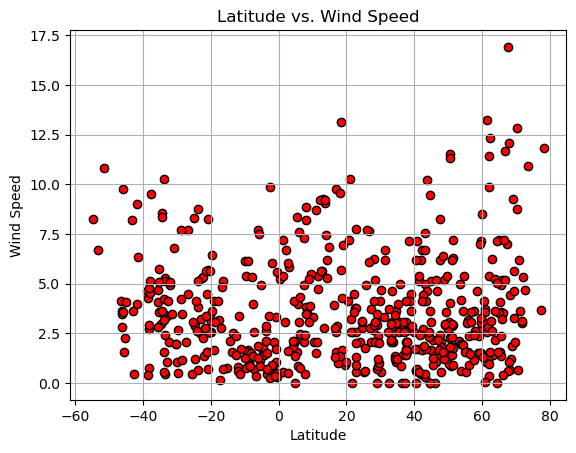

In [29]:
# Build the scatter plots for latitude vs. wind speed
lat_4 = city_data_df["Lat"]
humidity = city_data_df["Wind Speed"]
plt.scatter(lat_4, humidity, marker = "o", facecolors = "r", edgecolor = "black")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def regression(x_values, y_values, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress, "r")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "r")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,megion,61.0296,76.1136,-9.99,97,99,3.72,RU,1676524985
2,norman wells,65.2820,-126.8329,-27.98,76,75,1.54,CA,1676524979
6,mana,5.6592,-53.7767,24.15,92,100,3.99,GF,1676524987
10,port blair,11.6667,92.7500,28.01,69,32,5.37,IN,1676524988
11,miri,4.4148,114.0089,30.08,79,40,4.12,MY,1676524976


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,19.54,96,99,0.45,ZA,1676524900
3,ancud,-41.8697,-73.8203,8.61,72,62,3.98,CL,1676524896
4,tocopilla,-22.0920,-70.1979,21.61,84,37,1.35,CL,1676524914
5,busselton,-33.6500,115.3333,22.88,56,56,5.26,AU,1676524908
7,jakarta,-6.2146,106.8451,30.05,57,40,7.72,ID,1676524214


###  Temperature vs. Latitude Linear Regression Plot

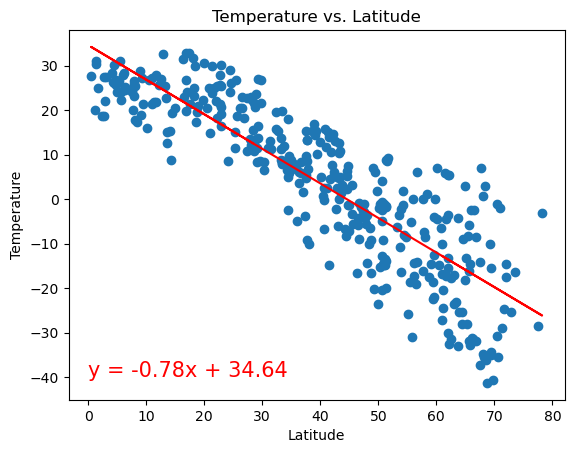

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

x_label = "Latitude"
y_label = "Temperature"
title = "Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates = (0, -40))

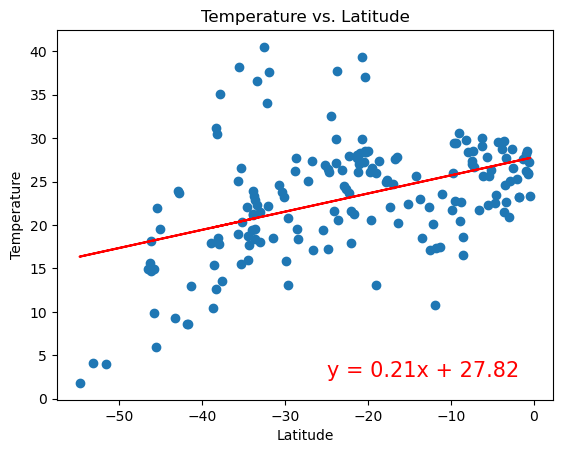

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

x_label = "Latitude"
y_label = "Temperature"
title = "Temperature vs. Latitude"
regression(x_values, y_values, text_coordinates = (-25, 2.5))

**Discussion about the linear relationship:** The Northern Hemisphere has a negative linear relationship with temperature decreasing as latitude increases. The Southern Hemisphere has a positive linear relationship with temperature increasing as latitude increases. 

### Humidity vs. Latitude Linear Regression Plot

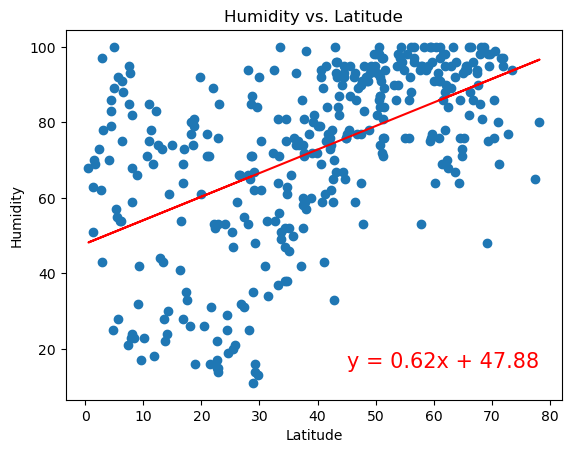

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

x_label = "Latitude"
y_label = "Humidity"
title = "Humidity vs. Latitude"
regression(x_values, y_values, text_coordinates = (45, 15))

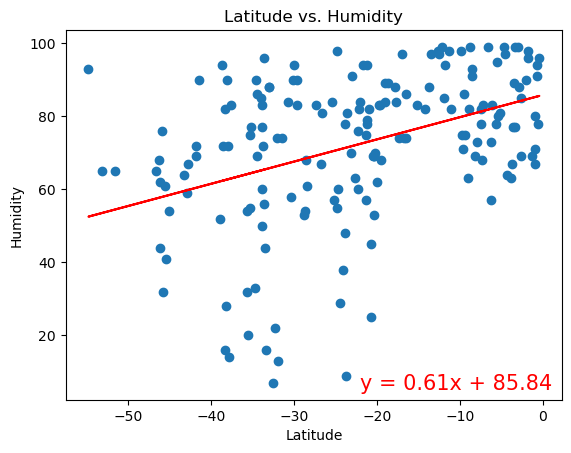

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

x_label = "Latitude"
y_label = "Humidity"
title = "Latitude vs. Humidity"
regression(x_values, y_values, text_coordinates = (-22, 5))

**Discussion about the linear relationship:** Both hemispheres have a positive linear relationship, with more disparity and outliers in the lower humidity and latitude range with less disparity as humidity and Latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

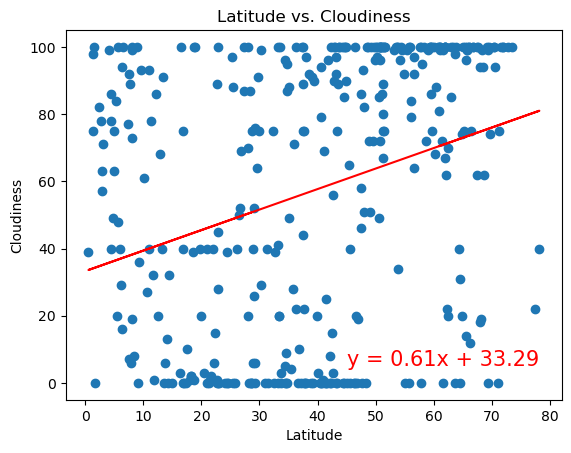

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

x_label = "Latitude"
y_label = "Cloudiness"
title = "Latitude vs. Cloudiness"
regression(x_values, y_values, text_coordinates = (45, 5))

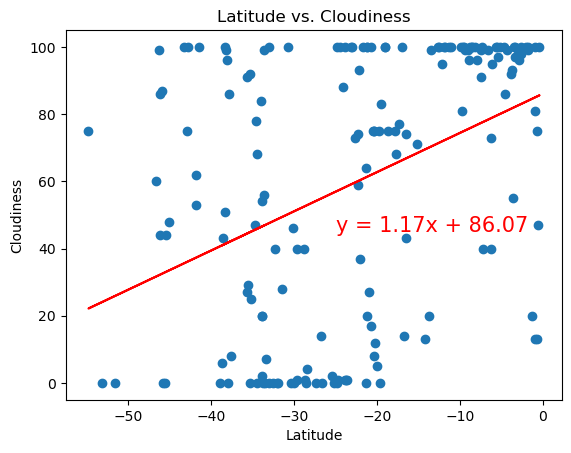

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

x_label = "Latitude"
y_label = "Cloudiness"
title = "Latitude vs. Cloudiness"
regression(x_values, y_values, text_coordinates = (-25, 45))

**Discussion about the linear relationship:** Both hemispheres have a positive linear relationship, and both have many cities at the 0 and 100 spectrum. 

### Wind Speed vs. Latitude Linear Regression Plot

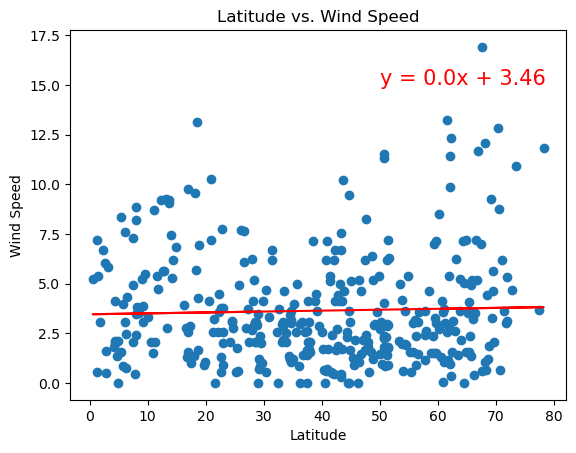

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

x_label = "Latitude"
y_label = "Wind Speed"
title = "Latitude vs. Wind Speed"
regression(x_values, y_values, text_coordinates = (50, 15))

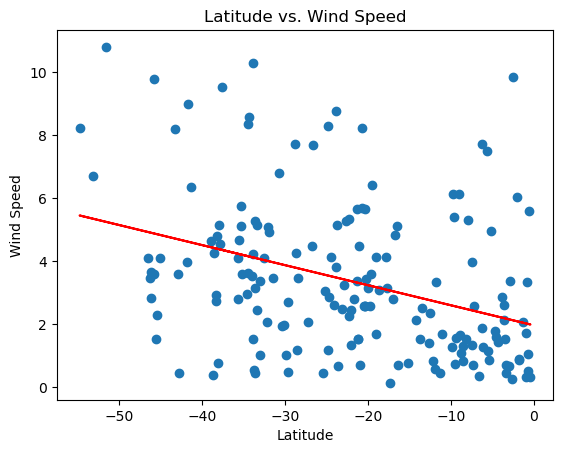

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

x_label = "Latitude"
y_label = "Wind Speed"
title = "Latitude vs. Wind Speed"
regression(x_values, y_values, text_coordinates = (-25, 45))

**Discussion about the linear relationship:** The Northern Hemisphere has a clustered linear relationship with less outliers than the South. The Southern Hemisphere has a negative linear relationship with many outliers